### Data Visualisations with Matplotlib

##### Goal: To create basic visuals using Matplotlib. 
##### Dataset: Airbnb data 2019 for New York City Airbnb rentals.

In [252]:
# import libraries and load data

import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("airbnb.csv")

##### What is inside the data?

In [254]:
# previewing the data
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [233]:
# about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [234]:
# What is the shape?
df.shape

(48895, 16)

In [235]:
# What are the basic exploratory statistics? 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Cleaning the dataset.

In [237]:
# Identify any missing values.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [238]:
# Identify any duplicates.
df.duplicated().sum()

0

In [239]:
# Drop the missing values of the last_review as no review has been left since.
df.dropna(subset=["last_review"],inplace=True)

In [240]:
# Identify any missing values after data cleaning.
df.isnull().sum()

id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [241]:
# identify data after cleaning.
df.shape

(38843, 16)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     38843

#### Data Visualisations

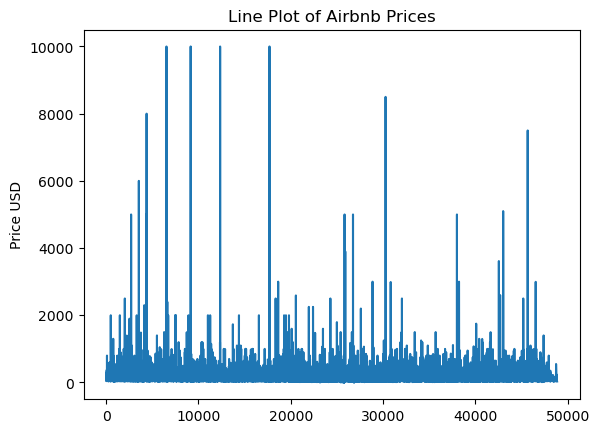

In [244]:
# plot initial visual

df["price"].plot()
plt.ylabel("Price USD")
plt.title("Line Plot of Airbnb Prices")
plt.show()

#automatically plots a bar chart

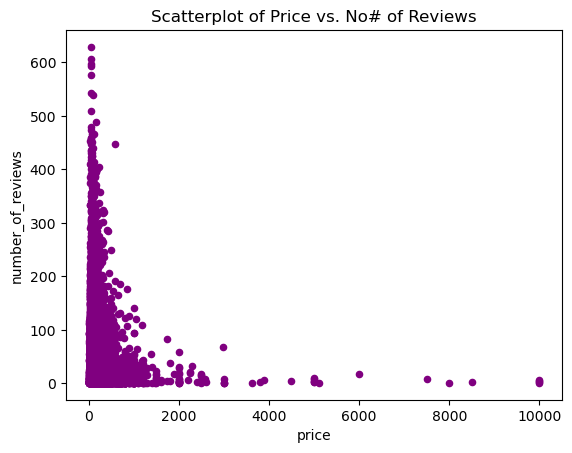

In [245]:
# 2nd plot.

df.plot(kind="scatter", x= "price",y= "number_of_reviews", color= "purple")
plt.title("Scatterplot of Price vs. No# of Reviews")
plt.show()


In [246]:
### Create Subplots

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,10)) 

# price vs. frequency histogram 
axs[0,0].hist(df["price"], bins=20, color="lightblue")
axs[0,0].set_title("Price vs. Frequency")
axs[0,0].set_xlabel("Price")
axs[0,0].set_ylabel("Frequency")

# number of reviews vs. frequency histogram 
axs[0,1].hist(df["number_of_reviews"], bins= 20, color="orange")
axs[0,1].set_title("Number of Reviews vs. Frequency")
axs[0,1].set_xlabel("Number of Reviews")
axs[0,1].set_ylabel("Frequency")

# group by type of room and avg price
room_type = df.groupby("room_type")["price"].mean()

axs[1,0].bar(df["room_type"], df["price"], color="lightgreen")
axs[1,0].set_title("Avg Price by Room Type")
axs[1,0].set_xlabel("Room Type")
axs[1,0].set_ylabel("Price")

# number of listing by each NYC borough
neighborhoods = df["neighborhood_group"].value_counts()
neighborhoods.columns = ["neighborhood_group", "count"]

axs[1,1].bar(neighborhoods["neighborhood_group"], neighborhoods["count"],color="pink")
axs[1,1].set_title("Listings by Neighborhood")
axs[1,1].set_xlabel("Neighbourhood")
axs[1,1].set_ylabel("Number of Listings")
